In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

In [0]:
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                 ignore_index=True)
    return dataset

In [0]:
train_set = create_dataset(10)

In [4]:
train_set

,x,y
0,0.000000,0.082209
1,0.111111,0.868601
2,0.222222,0.829982
3,0.333333,0.945035
4,0.444444,0.549849
5,0.555556,-0.173444
6,0.666667,-0.446780
7,0.777778,-1.285195
8,0.888889,-0.820736
9,1.000000,0.207734


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


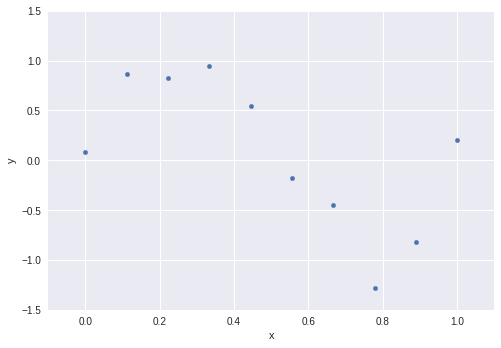

In [5]:
train_set.plot(kind='scatter', x='x', y='y',
             xlim=[-0.1, 1.1], ylim=[-1.5, 1.5])

In [0]:
def create_dataset(num):
    data_x = np.linspace(0, 1, num)
    data_y = np.sin(2*np.pi*data_x) + normal(loc=0, scale=0.3, size=num)
    dataset = DataFrame({'x': data_x, 'y': data_y})
    return dataset

In [0]:
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [0]:
def resolve_debug(dataset, m):
    t = dataset.y
    
    print ("\nt:")
    print (t)
    
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi, p], axis=1)

    print ("\nphi:")
    print (phi)
    
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    print ("\nws:")
    print (ws)
    
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [9]:
f = resolve_debug(train_set, 3)


t:
0    0.082209
1    0.868601
2    0.829982
3    0.945035
4    0.549849
5   -0.173444
6   -0.446780
7   -1.285195
8   -0.820736
9    0.207734
Name: y, dtype: float64

phi:
   x**0      x**1      x**2      x**3
0   1.0  0.000000  0.000000  0.000000
1   1.0  0.111111  0.012346  0.001372
2   1.0  0.222222  0.049383  0.010974
3   1.0  0.333333  0.111111  0.037037
4   1.0  0.444444  0.197531  0.087791
5   1.0  0.555556  0.308642  0.171468
6   1.0  0.666667  0.444444  0.296296
7   1.0  0.777778  0.604938  0.470508
8   1.0  0.888889  0.790123  0.702332
9   1.0  1.000000  1.000000  1.000000

ws:
[-4.65867810e-04  1.12646864e+01 -3.30949376e+01  2.19181084e+01]


In [0]:
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

In [0]:
def rms_error(dataset, f):
    return np.sqrt(np.sum((dataset.y - f(dataset.x))**2)/len(dataset))

In [0]:
def show_result(subplot, train_set, m):
    f = resolve(train_set, m)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)    

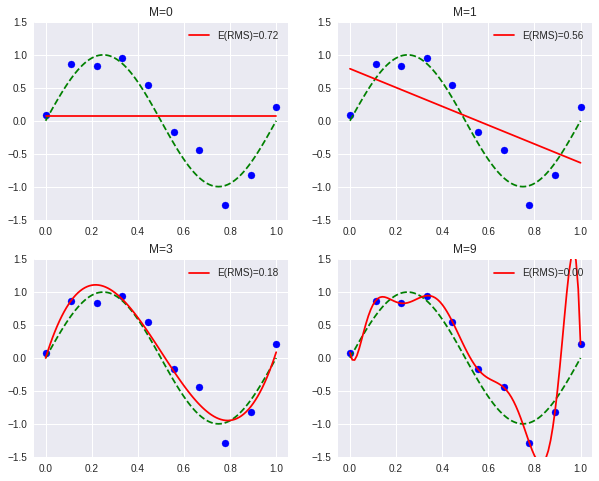

In [13]:
fig = plt.figure(figsize=(10, 8))
for i, m in enumerate([0, 1, 3, 9]):
    subplot = fig.add_subplot(2, 2, i+1)
    show_result(subplot, train_set, m)

In [0]:
def show_rms_trend(train_set, test_set):
    df = DataFrame(columns=['Training set', 'Test set'])
    for m in range(0, 10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(Series([train_error, test_error],
                              index=['Training set', 'Test set']),
                       ignore_index=True)
    df.plot(title='RMS Error', style=['-', '--'], grid=True, ylim=(0, 0.9))

In [0]:
def show_rms_trend_debug(train_set, test_set):
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0, 10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(Series([train_error, test_error],
                              index=['Training set', 'Test set']),
                       ignore_index=True)
    
    print (df)
    
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0, 0.9))

   Training set  Test set
0      0.855058  0.708602
1      0.541413  0.582534
2      0.519792  0.630706
3      0.100265  0.389124
4      0.060779  0.397522
5      0.047558  0.406463
6      0.031054  0.412402
7      0.030146  0.414785
8      0.029929  0.414330
9      0.000144  0.420334


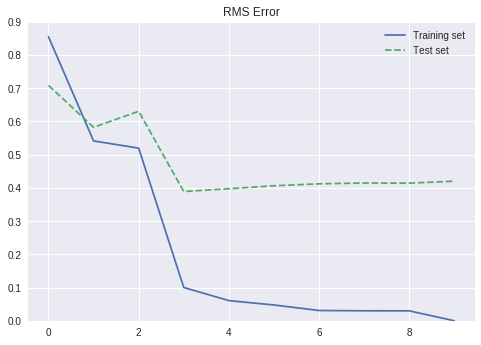

In [16]:
train_set = create_dataset(10)
test_set = create_dataset(10)
show_rms_trend_debug(train_set, test_set)